In [30]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## Tasks
1. entities (author, keywords)
2. disciplines (social sciences: e.g. jasist, scientometrics, natural science: neuroscience, chemisty)
3. times (2010-15 for training, 2016;16-17, 16-18, 16-19 for testing)
4. algorithms (CommonNeighbours, Jaccard, Katz)

In [4]:
import linkpred

In [5]:
!linkpred --help

usage: linkpred training-file [test-file] [options]

Easy link prediction tool

positional arguments:
  training-file         File with the training network
  test-file             File with the test network

optional arguments:
  -h, --help            show this help message and exit
  --debug               Show debug messages
  -q, --quiet           Don't show info messages
  -o [OUTPUT [OUTPUT ...]], --output [OUTPUT [OUTPUT ...]]
                        Type of output(s) to produce (default: recall-
                        precision). Allowed values are: recall-precision,
                        f-score, roc, cache-predictions, cache-evaluations,
                        fmax
  -f CHART_FILETYPE, --chart-filetype CHART_FILETYPE
                        File type for charts (default: pdf)
  -i, --no-interpolation
                        Do not interpolate recall-precision charts
  -p [PREDICTOR [PREDICTOR ...]], --predictors [PREDICTOR [PREDICTOR ...]]
                        Predictor

In [5]:
!linkpred \
C:\\Users\\Liser\\Desktop\\linchengwei_link_prediction\\data_transformation_output\\scientometrics\\netfiles\\co-author\\2010-15.net \
C:\\Users\\Liser\\Desktop\\linchengwei_link_prediction\\data_transformation_output\\scientometrics\\netfiles\\co-author\\2016-18.net -p AdamicAdar \
-o cache-evaluations

12:08:23 - INFO - Reading file 'C:\\Users\\Liser\\Desktop\\linchengwei_link_prediction\\data_transformation_output\\scientometrics\\netfiles\\co-author\\2010-15.net'...
12:08:23 - WARNING - Network contains multiple edges. These will be ignored.
12:08:23 - INFO - Successfully read file.
12:08:23 - INFO - Reading file 'C:\\Users\\Liser\\Desktop\\linchengwei_link_prediction\\data_transformation_output\\scientometrics\\netfiles\\co-author\\2016-18.net'...
12:08:23 - WARNING - Network contains multiple edges. These will be ignored.
12:08:24 - INFO - Successfully read file.
12:08:24 - INFO - Starting preprocessing...
12:08:24 - INFO - Removed 153 nodes (degree < 1)
12:08:24 - INFO - Removed 92 nodes (degree < 1)
12:08:24 - INFO - Removed 2264 nodes (not common)
12:08:24 - INFO - Removed 1730 nodes (not common)
12:08:24 - INFO - Finished preprocessing.
12:08:24 - INFO - Executing AdamicAdar...
12:08:24 - INFO - Finished executing AdamicAdar.
12:08:24 - INFO - Prediction run finished


In [ ]:
# co-author / co-occurrence

In [10]:
import time
!linkpred \
C:\\Users\\Liser\\Desktop\\linchengwei_link_prediction\\data_transformation_output\\scientometrics\\netfiles\\co-occurrence\\2010-15.net \
C:\\Users\\Liser\\Desktop\\linchengwei_link_prediction\\data_transformation_output\\scientometrics\\netfiles\\co-occurrence\\2016-19.net -p AdamicAdar \
-o cache-evaluations

12:12:43 - INFO - Reading file 'C:\\Users\\Liser\\Desktop\\linchengwei_link_prediction\\data_transformation_output\\scientometrics\\netfiles\\co-occurrence\\2010-15.net'...
12:12:43 - WARNING - Network contains multiple edges. These will be ignored.
12:12:43 - INFO - Successfully read file.
12:12:43 - INFO - Reading file 'C:\\Users\\Liser\\Desktop\\linchengwei_link_prediction\\data_transformation_output\\scientometrics\\netfiles\\co-occurrence\\2016-19.net'...
12:12:44 - WARNING - Network contains multiple edges. These will be ignored.
12:12:44 - INFO - Successfully read file.
12:12:44 - INFO - Starting preprocessing...
12:12:44 - INFO - Removed 0 nodes (degree < 1)
12:12:44 - WARNING - Network contains 2 self-loops. Removing...
12:12:44 - INFO - Removed 1 nodes (degree < 1)
12:12:44 - INFO - Removed 3340 nodes (not common)
12:12:44 - INFO - Removed 3160 nodes (not common)
12:12:44 - INFO - Finished preprocessing.
12:12:44 - INFO - Executing AdamicAdar...
12:12:47 - INFO - Finished exe

# main

## read cache evaluations .txt

In [11]:
import os
import pandas as pd
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

journal = input('scientometrics / jasist')
entity = input('co-author / co-occurrence')

path = os.getcwd()
all_eva_files = []
a1_eva_files, a2_eva_files, a31_eva_files, a32_eva_files, a4_eva_files = [], [], [], [], []
evaluation_result_path = path+"\\data_transformation_output\\{}\\netfiles\\{}\\".format(journal, entity)
for f in os.listdir(evaluation_result_path):
    if f.endswith(".txt"):
        all_eva_files.append(evaluation_result_path+f)
        if 'CommonNeighbours' in f:
            a1_eva_files.append(evaluation_result_path+f)
        elif 'Jaccard' in f:
            a2_eva_files.append(evaluation_result_path+f)
        elif 'Katz_beta001' in f:
            a31_eva_files.append(evaluation_result_path+f)
        elif 'Katz_beta01' in f:
            a32_eva_files.append(evaluation_result_path+f)
        elif 'AdamicAdar' in f:
            a4_eva_files.append(evaluation_result_path+f)
all_a_eva_files = [a1_eva_files, a2_eva_files, a31_eva_files, a32_eva_files, a4_eva_files]

scientometrics / jasistscientometrics
co-author / co-occurrenceco-author


In [12]:
def plot_by_time(eva_files, colors, algorithms, t):
    for i, eva_file in enumerate(eva_files):
        df_eva = pd.read_csv(eva_file, header=None, sep=' ')
        df_eva.columns=['TP', 'FP', 'FN', 'TN']
        
        tp, fp, fn, tn = df_eva['TP'], df_eva['FP'], df_eva['FN'], df_eva['TN']
        tpr = tp/(tp+fn)
        fpr = fp/(fp+tn)
        roc_auc = auc(fpr, tpr)
        
        ax.plot(fpr, tpr, color=colors[i], lw=3, label='{} {} ROC curve (area = %0.6f)'.format(algorithms, t[i]) % roc_auc)

In [16]:
a4_eva_files

['C:\\Users\\Liser\\Desktop\\linchengwei_link_prediction\\data_transformation_output\\scientometrics\\netfiles\\co-author\\2010-15-AdamicAdar-predictions_2020-07-27_12.07_t1.txt',
 'C:\\Users\\Liser\\Desktop\\linchengwei_link_prediction\\data_transformation_output\\scientometrics\\netfiles\\co-author\\2010-15-AdamicAdar-predictions_2020-07-27_12.07_t2.txt',
 'C:\\Users\\Liser\\Desktop\\linchengwei_link_prediction\\data_transformation_output\\scientometrics\\netfiles\\co-author\\2010-15-AdamicAdar-predictions_2020-07-27_12.08_t3.txt',
 'C:\\Users\\Liser\\Desktop\\linchengwei_link_prediction\\data_transformation_output\\scientometrics\\netfiles\\co-author\\2010-15-AdamicAdar-predictions_2020-07-27_12.08_t4.txt']

In [22]:
predictors = {'a1':'CommonNeighbours', 
              'a2':'Jaccard', 
              'a31': 'Katz_beta001',
              'a32': 'Katz_beta01',
              'a4':'AdamicAdar'}

('a31', 'Katz_beta001')

In [ ]:
# colors = 
# #y
# y_list = [(255,148,0),
#         (255,191,0),
#         (255,233,0),
#         (234,255,0)]
# for y in y_lst

In [27]:
use = [1,2,4]

In [29]:
import numpy as np



def generate_gradient_colors():
    
    np.array([255,221,51]) / 255

array([1.        , 0.86666667, 0.2       ])

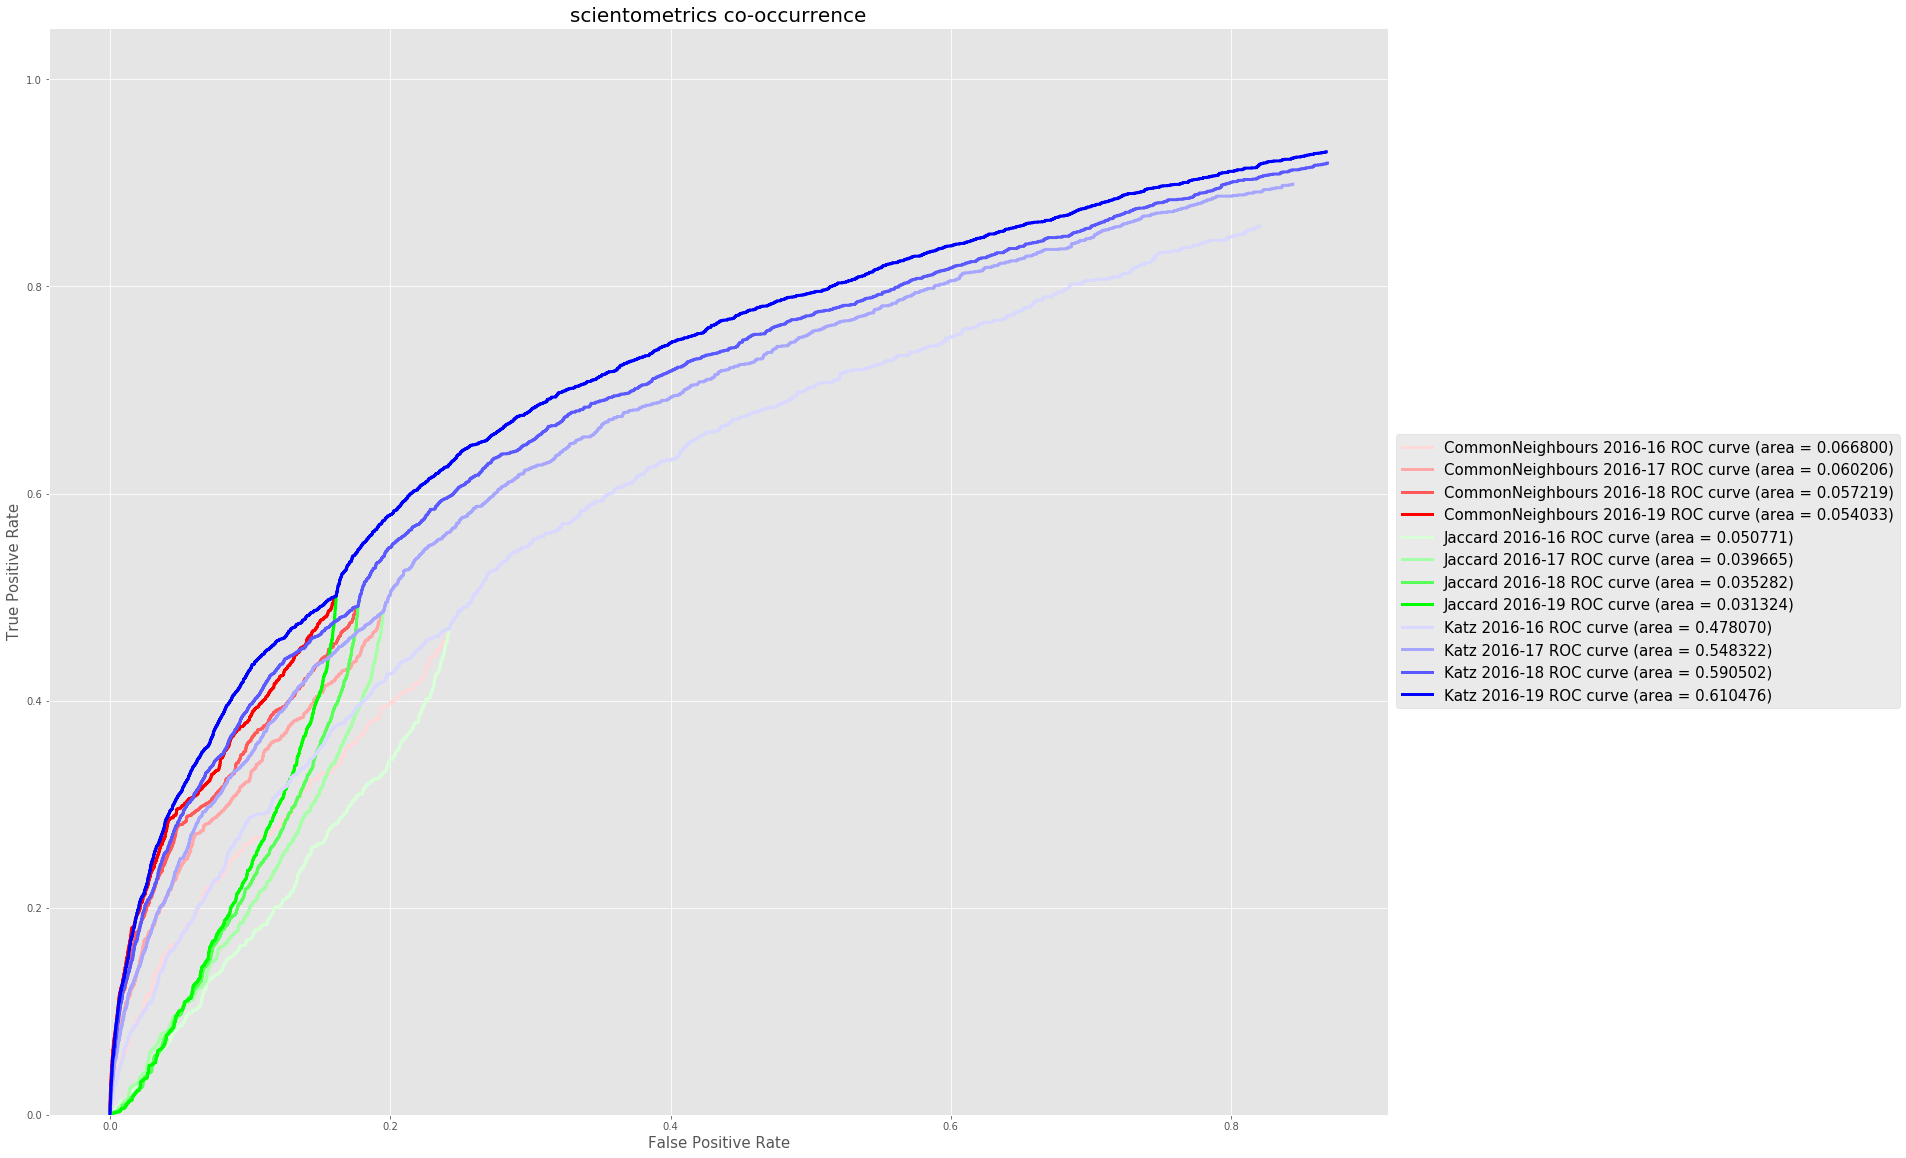

In [86]:
# main
t = ['2016-16',
    '2016-17',
    '2016-18',
    '2016-19']

predictors = {'a1':'CommonNeighbours', 
              'a2':'Jaccard', 
              'a31': 'Katz_beta001',
              'a32': 'Katz_beta01',
              'a4':'AdamicAdar'}

colors = {'r':[(1,0.85,0.85), 
          (1,0.65,0.65), 
          (1,0.35,0.35), 
          (1,0.00,0.00)],
         'g':[(0.85, 1, 0.85),
             (0.65, 1, 0.65),
             (0.35, 1, 0.35),
             (0.00, 1, 0.00)],
         'b':[(0.85,0.85,1),
             (0.65, 0.65,1),
             (0.35, 0.35,1),
             (0.00, 0.00,1)],
         'y':[(1,0.83,0.00),
             (1,0.87,)]}
fig = plt.figure(figsize=(30,20))
ax = plt.subplot(111)

plt.style.use('ggplot')
plt.ylim([0.0, 1.05])

for i, algo_eva_files in enumerate(all_a_eva_files):
    if i in use:
        color = list(colors.values())[i]
        algorithms = list(predictors.values())[i]
        plot_by_time(algo_eva_files, color, algorithms, t)
    else:
        print("SKIP: ")

# set legend outside of box
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=15)
plt.title('{} {}'.format(journal, entity), fontsize=20)
plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.savefig(os.getcwd()+'\\output figure\\{} {}.png'.format(journal, entity))

## example

C:\Users\Liser\Desktop\linchengwei_link_prediction\data_transformation_output\scientometrics\netfiles\co-author\evaluation\2010-15-CommonNeighbours-predictions_2020-07-23_15.21_t1.txt
C:\Users\Liser\Desktop\linchengwei_link_prediction\data_transformation_output\scientometrics\netfiles\co-author\evaluation\2010-15-CommonNeighbours-predictions_2020-07-23_15.22_t2.txt
C:\Users\Liser\Desktop\linchengwei_link_prediction\data_transformation_output\scientometrics\netfiles\co-author\evaluation\2010-15-CommonNeighbours-predictions_2020-07-23_15.23_t3.txt
C:\Users\Liser\Desktop\linchengwei_link_prediction\data_transformation_output\scientometrics\netfiles\co-author\evaluation\2010-15-CommonNeighbours-predictions_2020-07-23_15.24_t4.txt


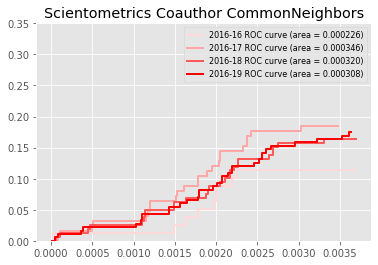

In [11]:

df_evas = []
colors = [(1,0.85,0.85), \
          (1,0.65,0.65), \
          (1,0.35,0.35), \
          (1,0.00,0.00)]
fig = plt.figure()
plt.style.use('ggplot')
plt.ylim([0.0, 0.35])
for i, eva_file in enumerate(eva_files):
    print(eva_file)
    df_eva = pd.read_csv(eva_file, header=None, sep=' ')
    df_eva.columns=['TP', 'FP', 'FN', 'TN']
    df_evas.append(df_eva)
    
    tp, fp, fn, tn = df_eva['TP'], df_eva['FP'], df_eva['FN'], df_eva['TN']
    tpr = tp/(tp+fn)
    fpr = fp/(fp+tn)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, color=colors[i], lw=2, label='{} ROC curve (area = %0.6f)'.format(t[i]) % roc_auc)
# plt.plot([0, 1], [0, 1], color='b', lw=2, linestyle='--')
plt.legend(loc="upper right", fontsize=8)
plt.title('Scientometrics Coauthor CommonNeighbors')
plt.savefig(os.getcwd()+'\\output figure\\Scientometrics Coauthor CommonNeighbors.png')

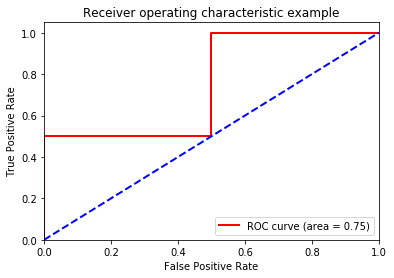

In [2]:
import numpy as np
from sklearn.metrics import roc_curve, auc
y = np.array([0, 0, 1, 1])
scores = np.array([0.1, 0.4, 0.35, 0.8])
fpr, tpr, _ = roc_curve(y, scores)
roc_auc = auc(fpr, tpr)

import matplotlib as mpl
#mpl.use('Agg')
import matplotlib.pyplot as plt

fig = plt.figure()
lw = 2
plt.plot(fpr, tpr, color='r', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='b', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
#fig.savefig('/tmp/roc.png')
plt.show()